# 决策树

## 分类树

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split

红酒数据集

In [2]:
from sklearn.datasets import load_wine

加载数据

In [3]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

数据维度

In [5]:
wine.data.shape

(178, 13)

以表格形式查看

In [6]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


特征名字

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

分隔 train、test

In [8]:
trainX, testX, trainY, testY = train_test_split(wine.data, wine.target, test_size=0.2)

In [9]:
trainX.shape

(142, 13)

In [10]:
testX.shape

(36, 13)

In [41]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(trainX, trainY)
score = clf.score(testX, testY) # accuracy

In [42]:
print("accuracy -> {}".format(score))

accuracy -> 0.9444444444444444


画出树的样子

In [25]:
import graphviz

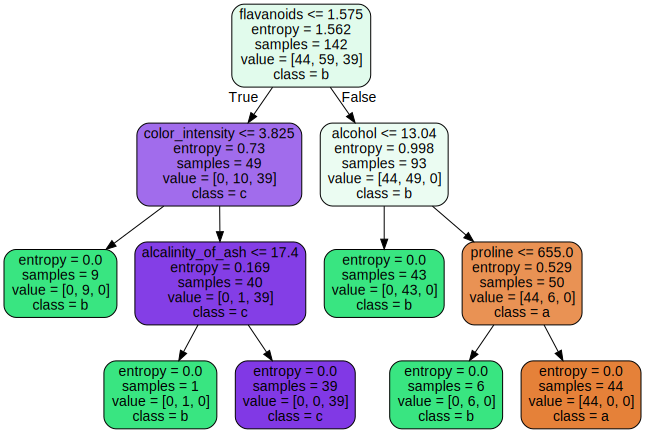

In [26]:
dot_data = tree.export_graphviz(clf,
                                feature_names=wine.feature_names,
                                class_names=['a', 'b', 'c'],
                                filled=True,
                                rounded=True, # 颜色填充
                                out_file=None # 圆角边框
                               )
grapt = graphviz.Source(dot_data)
grapt

每个特征值的权重

In [16]:
clf.feature_importances_

array([0.29903179, 0.        , 0.        , 0.03041094, 0.        ,
       0.        , 0.42041391, 0.        , 0.        , 0.13083328,
       0.        , 0.        , 0.11931008])

In [18]:
[*zip(wine.feature_names, clf.feature_importances_)]

[('alcohol', 0.29903179314445455),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.030410936009956164),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.4204139143649292),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.13083327635737077),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.11931008012328925)]

增加随机性参数

In [55]:
clf_r = tree.DecisionTreeClassifier(criterion="entropy",
                                   random_state = 250,
                                   splitter="random")
clf_r.fit(trainX, trainY)
score = clf_r.score(testX, testY) # accuracy

In [56]:
print("accuracy -> {}".format(score))

accuracy -> 1.0


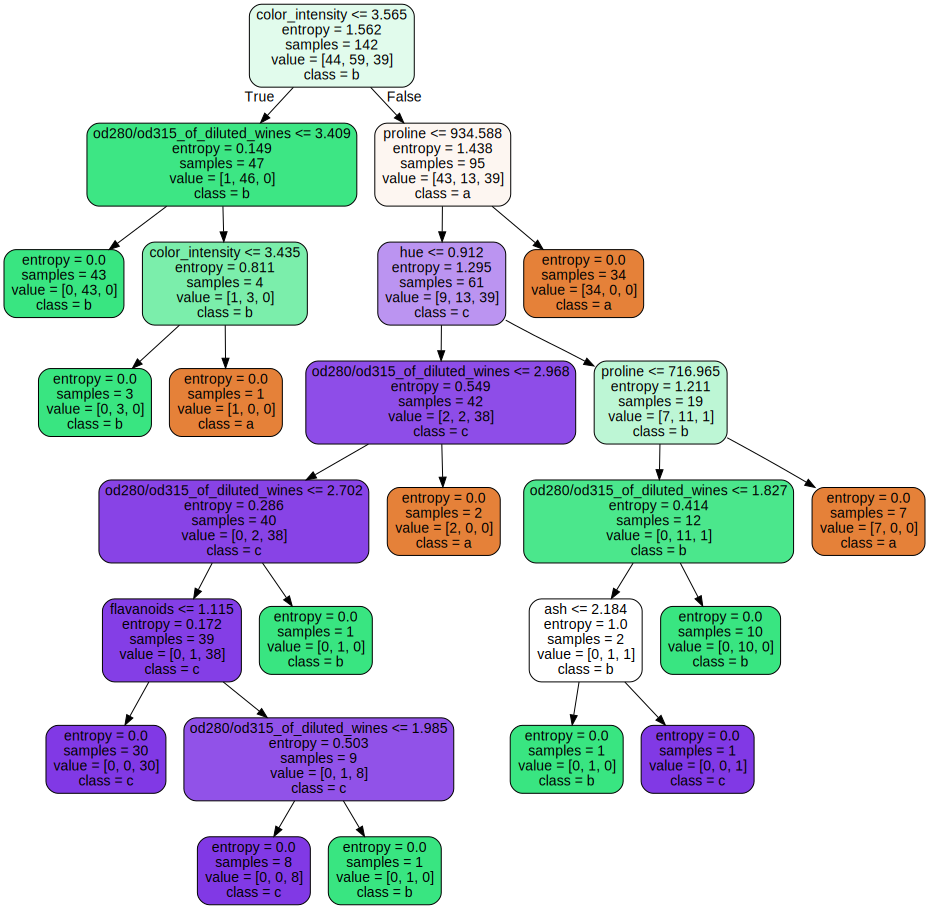

In [57]:
dot_data = tree.export_graphviz(clf_r,
                                feature_names=wine.feature_names,
                                class_names=['a', 'b', 'c'],
                                filled=True,
                                rounded=True, # 颜色填充
                                out_file=None # 圆角边框
                               )
grapt = graphviz.Source(dot_data)
grapt

### 剪枝
- max_depth 最大深度
- min_samples_leaf 叶子节点最小样本数
- min_samples_split 父节点最小划分样本数，小于此则不再划分
- max_features 最多可用的特征数，强行屏蔽一部分原始信息

accuracy -> 0.9444444444444444


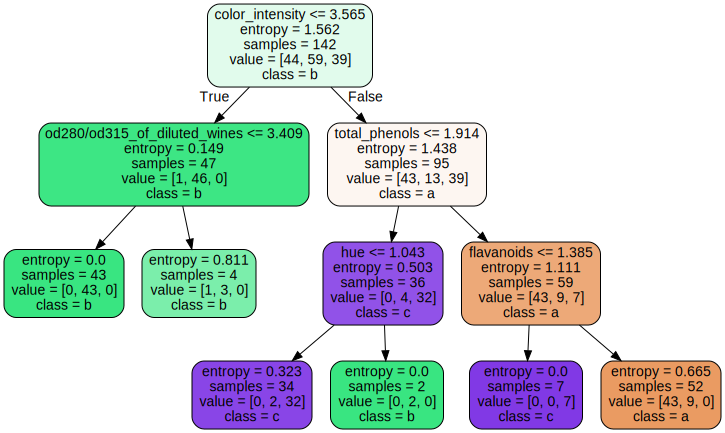

In [58]:
clf_c = tree.DecisionTreeClassifier(criterion="entropy",
                                    random_state = 250,
                                    splitter="random",
                                    max_depth=3,
                                    min_samples_leaf=2,
                                    min_samples_split=10
                                   )
clf_c.fit(trainX, trainY)

score = clf_c.score(testX, testY) # accuracy
print("accuracy -> {}".format(score))

dot_data = tree.export_graphviz(clf_c,
                                feature_names=wine.feature_names,
                                class_names=['a', 'b', 'c'],
                                filled=True,
                                rounded=True, # 颜色填充
                                out_file=None # 圆角边框
                               )
grapt = graphviz.Source(dot_data)
grapt

通过循环来选择最优的树深度

In [59]:
test = []
for i in range(10):
    clf_batter = tree.DecisionTreeClassifier(criterion="entropy",
                                            random_state = 250,
                                            splitter="random",
                                            max_depth=i+1
                                            )
    clf_batter.fit(trainX, trainY)
    test.append(clf_batter.score(testX, testY))

In [60]:
import matplotlib.pyplot as plt

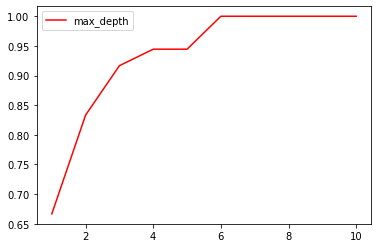

In [63]:
plt.plot(range(1,11), test, c='r', label="max_depth")
plt.legend()
plt.show()

目标权重参数 用于不平衡的数据集
- class_weight 给少量标签更多权重
- min_weight_fraction_leaf

#### 矩阵的维度变化

In [101]:
import numpy as np
a = np.array([1,2,3,4,5])
b = np.array([9,8,7,6,5])

In [102]:
print("a -> {}, b -> {}".format(a,b))

a -> [1 2 3 4 5], b -> [9 8 7 6 5]


In [103]:
print("a.shape -> {}, b.shape -> {}".format(a.shape,b.shape))

a.shape -> (5,), b.shape -> (5,)


reshape(-1,1) 和 reshape(1,-1)

In [104]:
a = a.reshape(-1,1)
b = b.reshape(1,-1)

In [105]:
print("a.shape -> {}, b.shape -> {}".format(a.shape,b.shape))

a.shape -> (5, 1), b.shape -> (1, 5)


In [106]:
print("a -> {}, b -> {}".format(a,b))

a -> [[1]
 [2]
 [3]
 [4]
 [5]], b -> [[9 8 7 6 5]]


np.squeeze 消除多余的维度

In [107]:
a = np.squeeze(a)
b = np.squeeze(b)

In [108]:
print("a.shape -> {}, b.shape -> {}".format(a.shape,b.shape))

a.shape -> (5,), b.shape -> (5,)


# 回归树

- 参数和接口与分类树基本相同
- class_weight 权重
- criterion 可选
 * 1、MSE 均方误差
 * 2、MAE 绝对值平均误差
 * 3、friedman_mse 菲尔德曼均方误差

回归树的score返回的是R平方
$$ R^2 = 1 - \frac{u}{v} $$
其中：
$$ u = \sum_{i=1}^{N} {(f_i - y_i)^2}  \quad v = \sum_{i=1}^{N} {(y_i - \hat{y})^2} $$
$u$ 是残差平方和，$v$ 是总平方和，$f_i$ 是模型预测值，$y_i$ 是样本真实值，$\hat{y}$ 是样本标签平均值

在统计学中对变量进行线性回归分析，采用最小二乘法进行参数估计时，**R平方为回归平方和与总离差平方和的比值**，表示总离差平方和中可以由回归平方和解释的比例，这一比例越大越好，模型越精确，回归效果越显著。R平方介于0~1之间，**越接近1，回归拟合效果越好，一般认为超过0.8的模型拟合优度比较高。**

虽然MSE永远为正，但是sklearn中取得是负均方误差

### 交叉验证
将模型划分为 n 份，每次取一份作为验证集，n-1 份作为训练集，对此计算评估模型的平均准确程度

用波士顿房价数据 (回归问题) 做交叉验证

In [113]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

不需要划分训练验证集合 
- cv 是交叉验证的次数
- scoring 是评估指标，选择负均方误差

In [115]:
boston = load_boston()
regress = DecisionTreeRegressor(random_state=20)
cross_val_score(regress, boston.data, boston.target, cv=10, scoring="neg_mean_squared_error")

array([-16.58235294, -10.12666667, -17.39568627, -94.34529412,
       -23.59627451, -45.01843137, -12.061     , -92.7236    ,
       -57.4742    , -17.0588    ])

### 举例：用回归树拟合正弦曲线

随机种子

In [116]:
rng = np.random.RandomState(20)

生成 80 个 0-5 之间的随机数并排序

In [117]:
x = np.sort(rng.rand(80,1) * 5, axis=0)

求出对应的 sin 值并且降为一维

In [125]:
y = np.squeeze(np.sin(x))
y.shape

(80,)

不添加噪声的图像

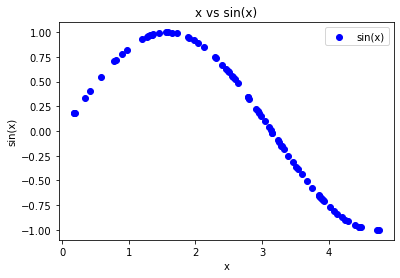

In [130]:
plt.figure()
plt.scatter(x, y, c='b', label='sin(x)')
plt.legend()
plt.xlabel("x");plt.ylabel("sin(x)");
plt.title("x vs sin(x)")
plt.show()

以 5 为步长，随机加减 y 的值

In [131]:
y[::5] += 0.5 - rng.rand(16)

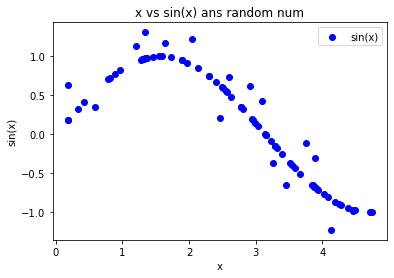

In [132]:
plt.figure()
plt.scatter(x, y, c='b', label='sin(x)')
plt.legend()
plt.xlabel("x");plt.ylabel("sin(x)");
plt.title("x vs sin(x) ans random num")
plt.show()

建立模型 深度分别为2、3、5 并训练

In [134]:
reg_1 = DecisionTreeRegressor(random_state=20, max_depth=2)
reg_2 = DecisionTreeRegressor(random_state=20, max_depth=3)
reg_3 = DecisionTreeRegressor(random_state=20, max_depth=5)

In [135]:
reg_1.fit(x,y)
reg_2.fit(x,y)
reg_3.fit(x,y)

DecisionTreeRegressor(max_depth=5, random_state=20)

生成测试用数据 .reshape() 和 np.newaxis 作用相同，都是升维

In [136]:
x_test = np.arange(0,5,0.01)[:,np.newaxis]

分别用三个模型预测结果

In [137]:
y_1 = reg_1.predict(x_test)
y_2 = reg_2.predict(x_test)
y_3 = reg_3.predict(x_test)

画出三个模型对应的预测图像

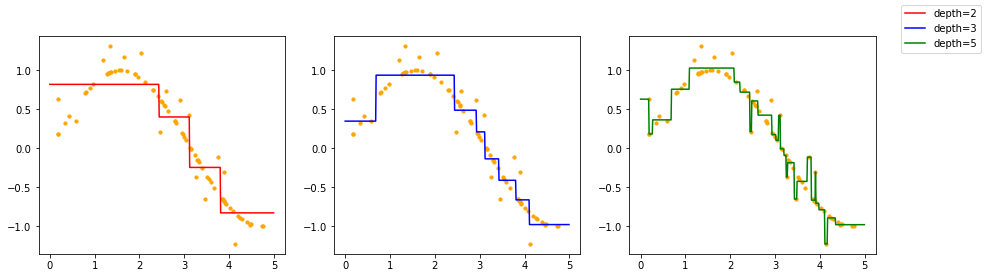

In [159]:
fig = plt.figure(figsize=(15,4))

ax=fig.add_subplot(131)
bx=fig.add_subplot(132)
cx=fig.add_subplot(133)
ax.plot(x_test, y_1, c='r', label="depth=2")
ax.scatter(x,y,c='orange',s=10)
bx.plot(x_test, y_2, c='b', label="depth=3")
bx.scatter(x,y,c='orange',s=10)
cx.plot(x_test, y_3, c='g', label="depth=5")
cx.scatter(x,y,c='orange',s=10)
fig.legend()
plt.show()

### 泰坦尼克号数据集

In [160]:
from sklearn.model_selection import GridSearchCV

#### 加载数据

In [164]:
data = pd.read_csv("data/1_data.csv")

In [168]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 特征选择
针对与任务无关的列、缺失值太多的列，删掉

inplace 表示是否覆盖 axis=1 是对列操作

In [173]:
data.drop(['Ticket', 'Name', 'Cabin'], inplace=True, axis = 1)

In [174]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### 处理缺失值

针对年龄，缺失值用均值填充

In [175]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


针对 Embarked 采用直接删除那两个缺失值所在的行

In [177]:
data = data.dropna(axis=0)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


#### 将字符型特征编码

这里采用的编码方式不是最优的，针对这种没有大小关系的类别，可采用onehot编码方式。

In [184]:
label = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: label.index(x))

/var/folders/zm/vr13918s0qg8jn65gn07_jqw0000gn/T/ipykernel_16457/897639079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = data['Embarked'].apply(lambda x: label.index(x))


In [185]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


针对性别做处理

In [189]:
data['Sex'] = (data['Sex'] == 'male').astype('int')

/var/folders/zm/vr13918s0qg8jn65gn07_jqw0000gn/T/ipykernel_16457/3426856229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = (data['Sex'] == 'male').astype('int')


In [190]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


#### 分离 feature 和 target

In [192]:
x = data.iloc[:,data.columns != 'Survived']

In [194]:
x.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0


In [195]:
y = data.iloc[:,data.columns == 'Survived']

In [198]:
y.head(3)

,Survived
0,0
1,1
2,1


#### 划分训练测试集

In [199]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3)

In [202]:
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
568,569,3,1,29.699118,0,0,7.2292,1
306,307,1,0,29.699118,0,0,110.8833,1
429,430,3,1,32.000000,0,0,8.0500,0
52,53,1,0,49.000000,1,0,76.7292,1
873,874,3,1,47.000000,0,0,9.0000,0


恢复索引的顺序 drop=True 是不要之前的索引了

In [203]:
Xtrain.reset_index(drop=True, inplace=True)

In [204]:
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,569,3,1,29.699118,0,0,7.2292,1
1,307,1,0,29.699118,0,0,110.8833,1
2,430,3,1,32.000000,0,0,8.0500,0
3,53,1,0,49.000000,1,0,76.7292,1
4,874,3,1,47.000000,0,0,9.0000,0


In [205]:
Xtest.reset_index(drop=True, inplace=True)
Ytrain.reset_index(drop=True, inplace=True)
Ytest.reset_index(drop=True, inplace=True)

#### 构建训练模型

In [210]:
clf_titanic = tree.DecisionTreeClassifier(random_state=20)
clf_titanic.fit(Xtrain, Ytrain)
score_titanic = clf_titanic.score(Xtest, Ytest)
score_titanic

0.7715355805243446

交叉验证

In [211]:
clf_titanic_cv = tree.DecisionTreeClassifier(random_state=20)
score_titanic_cv = cross_val_score(clf_titanic_cv, x, y, cv=10).mean()
score_titanic_cv

0.7492211440245148

循环画出参数 max_depth 的图

In [239]:
scores_maxdepth = []
scores_train = []
for i in range(10):
    clf_titanic_maxdepth = tree.DecisionTreeClassifier(random_state=30,
                                                      max_depth=i+1,
                                                      criterion='entropy')
    clf_titanic_maxdepth.fit(Xtrain, Ytrain)
    scores_train.append(clf_titanic_maxdepth.score(Xtrain, Ytrain))
    scores_maxdepth.append(cross_val_score(clf_titanic_maxdepth,x, y).mean())

画出图像

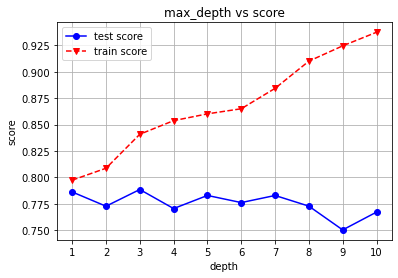

In [240]:
plt.figure()
plt.plot(range(1,11), scores_maxdepth, 'bo-', label='test score')
plt.plot(range(1,11), scores_train, 'rv--', label='train score')
plt.xlabel('depth');plt.ylabel('score')
plt.title('max_depth vs score')
plt.legend();plt.grid()
plt.xticks(range(1,11))
plt.show()

很明显模型过拟合了...

### 网格搜索
本质上就是枚举，一个一个的试

In [242]:
paramaters = {
    'criterion':('gini', 'entropy'),
    'max_depth':[*range(1,11)],
    'min_samples_leaf':[*range(5,20,5)],
    'splitter':('best', 'random')
    
}
clf_gs = tree.DecisionTreeClassifier(random_state=20)
GS = GridSearchCV(clf_gs, paramaters, cv=5)
GS = GS.fit(Xtrain, Ytrain)

网格搜索的接口
- best_params_ 返回的是最优的参数
- best_score_ 最佳精确性能

In [244]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [245]:
GS.best_score_

0.8343870967741935